# Jupyter Tutorial (part 2): Widgets

* Creating interactive plots using the `FloatSlider` widget.
* Other widget types (integer sliders, toggle buttons, etc.)
* 3D plots
* Generating HTML5 animations

## Plots with slider widgets


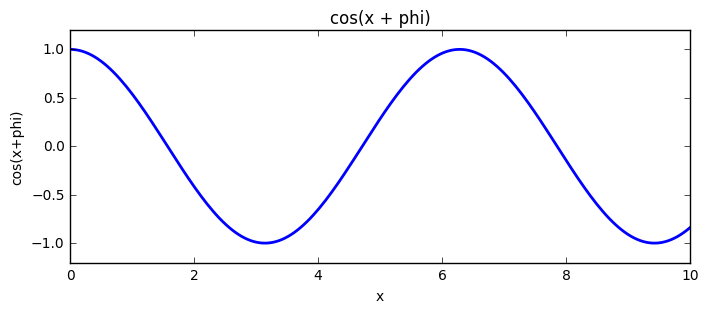

In [1]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, cos
import matplotlib.pyplot as plt

def plot_cos(phi):
    ## Plot parameters
    xmin, xmax, nx = 0.0, 10.0, 200
    ymin, ymax     = -1.2, 1.2

    x = linspace(xmin, xmax, nx)
    y = cos(x + phi)
    plt.figure(figsize=(8,3))
    plt.plot(x, y, linewidth=2)
    plt.title("cos(x + phi)")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('x')
    plt.ylabel('cos(x+phi)')

interact(plot_cos,
         phi=FloatSlider(min=-3.2, max=3.2, step=0.1, value=0.0));

### More advanced FloatSlider usage<a name="advanced_floatslider"></a>

* Multiple sliders
* Slider descriptions

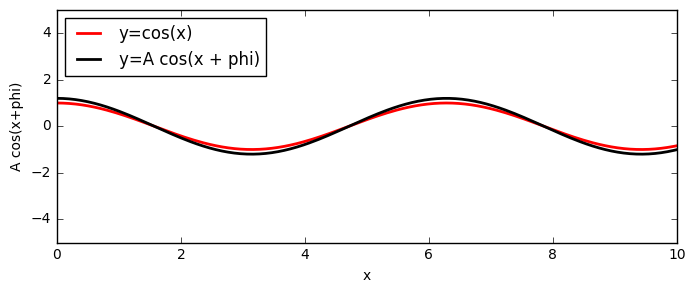

In [2]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, cos
import matplotlib.pyplot as plt

def plot_cos_compare(phi, A):
    ## Plot parameters
    xmin, xmax, nx = 0.0, 10.0, 200
    ymin, ymax     = -5.0, 5.0

    x = linspace(xmin, xmax, nx)
    y = A * cos(x + phi)
    y0 = cos(x)
    plt.figure(figsize=(8,3))
    plt.plot(x, y0, color='r', linewidth=2, label="y=cos(x)")
    plt.plot(x, y, color='k', linewidth=2, label="y=A cos(x + phi)")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('x')
    plt.ylabel('A cos(x+phi)')
    plt.legend(loc="upper left")

interact(plot_cos_compare,
         phi = FloatSlider(min=-3.2, max=3.2, step=0.1, value=0.0, description="phase"),
         A   = FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.2, description="amplitude"));

## Other widget types



IntSlider

ToggleButtons

http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html


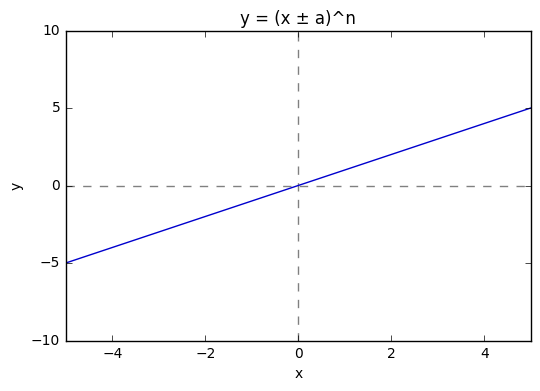

In [16]:
%matplotlib inline
from ipywidgets import interact, FloatSlider, ToggleButtons, IntSlider
from numpy import linspace, exp, sign
import matplotlib.pyplot as plt

def plot_polyn(n, sgn, a):
    ## Plot parameters
    xmin, xmax, nx = -5.0, 5.0, 200
    ymin, ymax     = -10.0, 10.0
    col1, col2     = "mediumblue", "grey"
    if sgn == '+':
        s = 1.
    else:
        s = -1.

    ## Plot the function
    x = linspace(xmin, xmax, nx)
    y = (x + s * a)**n
    plt.plot([xmin, xmax], [0.0, 0.0], '--', color=col2)
    plt.plot([0.0, 0.0], [ymin, ymax], '--', color=col2)
    plt.plot(x, y, color=col1)

    ## Axis labels, etc.
    plt.title("y = (x ± a)^n")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('x')
    plt.ylabel('y')

interact(plot_polyn,
         n    = IntSlider(min=0, max=10, value=1, description="n (power)"),
         sgn  = ToggleButtons(description='Sign of x-shift', options=['+', '-']),
         a    = FloatSlider(min=0.0,  max=2.0, step=0.1,  value=0.0, description='Magnitude of x-shift'));

## 3D plots

In [ ]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, meshgrid, cos, sin, pi, ones
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

def plot_sqrt_arg(thetab):

    rmin, rmax, nr = 0.05, 3., 25
    rvec = linspace(rmin, rmax, nr)
    npmin, dphi = 10, 0.1

    def plot_branch(ax, phimin, phimax, m, plus_branch):
        delta_phi = phimax - phimin
        if delta_phi < 1e-4: return

        ## Generate a triangular mesh for the surface
        nphi   = max(npmin, int(delta_phi/dphi))
        phivec = linspace(phimin, phimax, nphi)
        rr, pp = meshgrid(rvec, phivec)
        xt, yt = rr*cos(pp), rr*sin(pp)
        x, y = xt.flatten(), yt.flatten()
        tri  = mtri.Triangulation(x, y).triangles

        phi = 0.5*pp.flatten() + m * pi
        if plus_branch:
            col = "darkorange"
        else:
            col = "royalblue"
        ax.plot_trisurf(x, y, phi, triangles=tri,
                        linewidth=0.1, alpha=1.0, color=col)

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ## Draw some guides to the eye
    phi = linspace(-pi, pi, 200)
    ax.plot(rmax*cos(phi), rmax*sin(phi), -pi*ones(len(phi)), color="grey")
    ax.plot([0, rmax*cos(thetab)], [0, rmax*sin(thetab)], [-pi, -pi],
            linewidth=3, color="red")

    ## We will plot the branches in several segments, then join them.
    ## Main parts of + branch and - branch:
    if thetab < 0:
        plot_branch(ax, thetab, 0,   0, True)
        plot_branch(ax, 0, pi,       0, True)
        plot_branch(ax, -pi, thetab, 0, False)
    else:
        plot_branch(ax, thetab, pi, 0, True)
        plot_branch(ax, -pi, 0,     0, False)
        plot_branch(ax, 0, thetab,  0, False)

    theta1 = min(thetab, 0)
    plot_branch(ax, -pi + 0.001, theta1, 1, True)  # Upper part of + branch
    plot_branch(ax, theta1, 0, 1, False) # Upper part of - branch

    theta2 = max(thetab, 0)
    plot_branch(ax, 0, theta2,  -1, True)  # Lower part of + branch
    plot_branch(ax, theta2, pi, -1, False) # Lower part of - branch

    ## Set plot axis parameters
    ax.view_init(elev=30., azim=-100)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('arg(f)')
    ax.set_xlim3d(-rmax, rmax)
    ax.set_ylim3d(-rmax, rmax)
    ax.set_zlim3d(-pi, pi)

interact(plot_sqrt_arg,
         thetab = FloatSlider(min=-3.1, max=3.1, step=0.1, value=-3.1,
                              description='Branch cut angle'));


## Plotting HTML5 animations


In [15]:
%matplotlib inline
from numpy import linspace, exp, cos, sqrt
import matplotlib.pyplot as plt

## These statements enable HTML5 video output.
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

def oscillation_animation():
    ## Plot parameters
    amplitude, gamma, omega0 = 1.0, 0.1, 1.0
    tmin, tmax, nt = 0., 50., 200
    nframes, frame_dt = 100, 50
    tmin_plt, xlim = -5, 1.2 # Axis limits
    circ_pos = -2

    ## Set up the drawing area
    fig = plt.figure(figsize=(8,4))
    ax  = plt.subplot(1,1,1)
    ax.set_xlim(tmin_plt, tmax)
    ax.set_ylim(-xlim, xlim)

    ## Draw the static parts of the figure
    t = linspace(tmin, tmax, nt)
    x = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
    ax.plot(t, x, color='blue', linewidth=2)
    plt.title('Motion of a damped harmonic oscillator.')
    plt.xlabel('t')
    plt.ylabel('x')

    ## Initialize the plot objects to be animated (`line', `circ', `dash')
    ## with empty plot data.  They'll be used by the `animate` subroutine.
    line, = ax.plot([], [], color='grey', linewidth=2)
    circ, = ax.plot([], [], 'o', color='red', markersize=15)
    dash, = ax.plot([], [], '--', color='grey', markersize=15)
    plt.close();

    ## Initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        circ.set_data([], [])
        dash.set_data([], [])
        return line, circ, dash

    ## Animation function. This is called sequentially for different
    ## integer n, running from 0 to nframes-1 (inclusive).
    def animate(n):
        t = tmin + (tmax-tmin)*n/nframes
        line.set_data([t, t], [-xlim, xlim])        
        xc = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
        circ.set_data(circ_pos, xc)
        dash.set_data([circ_pos, t], [xc, xc])
        return line, circ, dash

    # Call the animator. blit=True means only re-draw the parts that have changed.
    animator = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=nframes, interval=frame_dt, blit=True)
    return animator

oscillation_animation()